In [196]:
import numpy as np
import pandas as pd

In [197]:
df = pd.read_csv("UpdatedResumeDataSet.csv")

In [198]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [199]:
df.shape

(962, 2)

# Exploring Category


In [200]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Data Science                 40
ETL Developer                40
Operations Manager           40
Mechanical Engineer          40
Blockchain                   40
Sales                        40
Arts                         36
Database                     33
PMO                          30
Electrical Engineering       30
Health and fitness           30
DotNet Developer             28
Business Analyst             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: Category, dtype: int64

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\rumon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


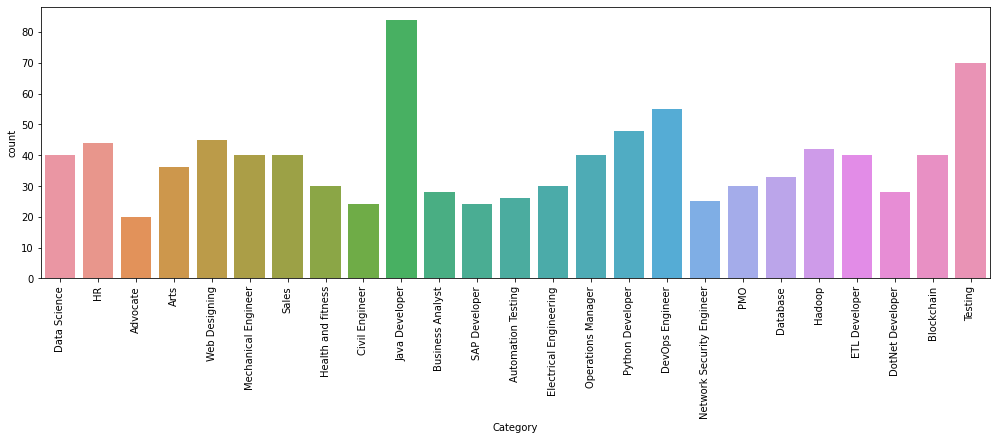

In [202]:
plt.figure(figsize=(17,5))
sns.countplot(df['Category'])
plt.xticks(rotation=90)
plt.show()

In [203]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

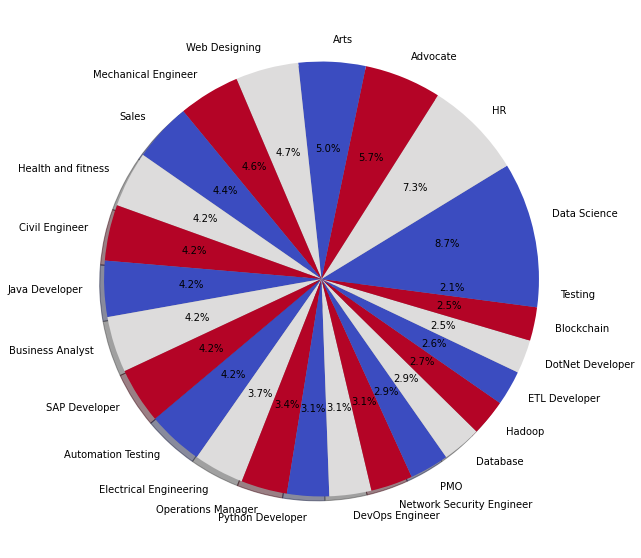

In [204]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,10))
plt.pie(counts,labels = labels,autopct='%1.1f%%',shadow= True, colors = plt.cm.coolwarm(np.linspace(0,1,3)))
plt.show()

# Resume exploring

In [205]:
df['Category'][0]

'Data Science'

In [206]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

# cleaning data

In [207]:
# 1. URls
#2 . hashtags
#3 . mentions
#4 . special letters
#5 . punctions

In [208]:
import re
def clean_resume(txt):
    clean_text = re.sub('http\S+\s',' ' ,txt)    #url link is http://hello world and acces it @gmail.com=>url link is  world and acces it @gmail.com
    clean_text = re.sub('RT|cc',' ', clean_text)
    clean_text = re.sub('#\S+',' ' ,clean_text)   #my #### #n url link is  http://hello world and acces it @gmail.com=>my   url link is  world and acces it
    clean_text = re.sub('@\S+',' ' ,clean_text) # url link is  world and acces it 
    clean_text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>@[\]^_`{|}~"""),' ',clean_text)
    clean_text = re.sub(r'[^\x00-\x7f]', ' ', clean_text)
    clean_text = re.sub('\s+', ' ',clean_text)
    
    return clean_text

In [209]:
clean_resume("my #### #n url link is  http://hello world and acces it @gmail.com")

'my url link is world and a es it '

In [210]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [211]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

# Words into categorical values

In [212]:
df


,Category,Resume
0,Data Science,Skills Programming Languages Python pandas num...
1,Data Science,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,Areas of Interest Deep Learning Control System...
3,Data Science,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,Testing,Computer Skills Proficient in MS office Word B...
958,Testing,Willingness to a ept the challenges Positive ...
959,Testing,PERSONAL SKILLS Quick learner Eagerness to lea...
960,Testing,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [275]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [276]:
# text to convert numerical number
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [257]:
df

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 B E UIT...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,23,Computer Skills Proficient in MS office Word B...
958,23,Willingness to a ept the challenges Positive ...
959,23,PERSONAL SKILLS Quick learner Eagerness to lea...
960,23,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [216]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [259]:
# ['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
#      'Mechanical Engineer', 'Sales', 'Health and fitness',
#       'Civil Engineer', 'Java Developer', 'Business Analyst',
#      'SAP Developer', 'Automation Testing', 'Electrical Engineering',
#      'Operations Manager', 'Python Developer', 'DevOps Engineer',
#      'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
#       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'] dtype= object,

# Vectorization

In [260]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')

In [261]:
tfidf.fit(df['Resume'])
X = tfidf.transform(df['Resume'])

In [262]:
X

<962x7351 sparse matrix of type '<class 'numpy.float64'>'
	with 164261 stored elements in Compressed Sparse Row format>

In [264]:
y = df['Category']

# Splitting

In [265]:
from sklearn.model_selection import train_test_split

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [267]:
X_train.shape

(769, 7351)

In [268]:
X_test.shape

(193, 7351)

# Train  models & classification

In [269]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Ensure that X_train and X_test are dense if they are sparse..
X_train = X_train.toarray() if hasattr(X_train, 'toarray') else X_train
X_test = X_test.toarray() if hasattr(X_test, 'toarray') else X_test

# now train KNeighbors classifier
KNN_model = OneVsRestClassifier(KNeighborsClassifier())
KNN_model.fit(X_train,y_train)
y_pred_KNN = KNN_model.predict(X_test)
print("KNeighborsClassifier_result : ")
print(f"Accuracy: {accuracy_score(y_test, y_pred_KNN)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred_KNN)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_KNN)}")

KNeighborsClassifier_result : 
Accuracy: 0.9844559585492227
Confusion Matrix: 
[[ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0
   0]
 [ 0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  6  0 

In [270]:
# now let's try RandomForestClassifier for improve result


In [299]:

#from sklearn.ensemble import RandomForestClassifier
#RFC_model = OneVsRestClassifier(RandomForestClassifier())
#RFC_model.fit(X_train,y_train)
#y_pred_RFC = RFC_model.predict(X_test)
#print("RandomForestClassifier_result : ")
#print(f"Accuracy_score : {accuracy_score(y_test,y_pred_RFC)}")
#print(f"Confusion_matrix : \n{confusion_matrix(y_test,y_pred_RFC)}")
#print(f"Classification_report : \n{classification_report(y_test,y_pred_RFC)}")

In [291]:
# Now we try Support vector machines (SVM) for improve result 

In [292]:
from sklearn.svm import SVC
SVC_model = OneVsRestClassifier(SVC())
SVC_model.fit(X_train,y_train)
y_pred_SVC = SVC_model.predict(X_test)
print("SVC_result : ")
print(f"Accuracy_score : {accuracy_score(y_test,y_pred_SVC)}")
print(f"Confusion_matrix : \n{confusion_matrix(y_test,y_pred_SVC)}")
print(f"Classification_report: \n{classification_report(y_test,y_pred_SVC)}")


SVC_result : 
Accuracy_score : 0.9948186528497409
Confusion_matrix : 
[[ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0 

# Save Model& needed file

In [293]:
# pickle dump
import pickle
pickle.dump(le, open("encoder.pkl",'wb'))
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(SVC_model, open('clf.pkl', 'wb'))

#  Prediction System

In [296]:
def pred(input_resume):
    # Preprocess the input text (e.g., cleaning, etc.)
    cleaned_text = clean_resume(input_resume) 

    # transform the cleaned_resume using the trained tfidfvectorizer
    vectorized_text =  tfidf.transform([cleaned_text])
    
    # Convert sparse matrix to dense
    vectorized_text = vectorized_text.toarray()
    
     # Prediction
    predicted_category = SVC_model.predict(vectorized_text)
    
    # get the predicted category name
    #Pre_category_name = le.inverse_transform(predicted_category)
    
     # Extract the prediction value (since `predicted_category` is a NumPy array)
    predicted_category_id = predicted_category[0]


    # map category ID to category name
    category_mapping = {


        6: "Data Science",
        12: "HR",
        0: "Advocate",
        1: "Arts",
        24: "Web Designing",
        16: "Mechanical Engineer",
        22: "Sales",
        14: "Health and fitness",
        5: "Civil Engineer",
        15: "Java Developer",
        4: "Business Analyst",
        21: "SAP Developer",
        2: "Automation Testing",
        11: "Electrical Engineering",
        18: "Operations Manager",
        20: "Python Developer",
        8: "DevOps Engineer",
        17: "Network Security Engineer",
        19: "PMO",
        7: "Database",
        13: "Hadoop",
        10: "ETL Developer",
        9: "DotNet Developer",
        3: "Blockchain",
        23: "Testing"



    }

    category_name = category_mapping.get(predicted_category_id,"Unknown")
    #print("Predicted category:", category_name)
    #print(prediction_id)
    
    return category_name

In [297]:
myresume = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""
result = pred(myresume)
print("Predicted Category:", result)


Predicted Category: Data Science


In [298]:
myresume = """John Doe is an experienced Network Security Engineer with over 7 years of expertise in designing, 
implementing, and managing network security infrastructures. Specializing in safeguarding critical 
network systems, John has worked with various organizations to protect against cyber threats, data 
breaches, and unauthorized access. He is proficient in deploying firewalls, intrusion detection systems 
(IDS), VPNs, and network monitoring tools to ensure the integrity and security of networks. 
John holds a degree in Computer Science and certifications in several cybersecurity domains, including 
Certified Information Systems Security Professional (CISSP), Certified Ethical Hacker (CEH), and Cisco 
Certified Network Associate (CCNA). He has extensive experience in troubleshooting and resolving 
network vulnerabilities, and has played a key role in conducting security audits and risk assessments. 
Key Skills: - Network Security Architecture - Firewall Management and Configuration - Intrusion Detection and Prevention Systems (IDS/IPS) - Virtual Private Networks (VPNs) - Security Audits and Risk Assessments - Cybersecurity Incident Response - Network Monitoring and Traffic Analysis - Vulnerability Assessment and Penetration Testing - Data Encryption and Secure Communications 
Certifications: - CISSP (Certified Information Systems Security Professional) - CEH (Certified Ethical Hacker) - CCNA (Cisco Certified Network Associate) - CompTIA Security+ 
Education: 
BSc in Computer Science, XYZ University, 2012-2016 
Professional Experience: - Network Security Engineer at ABC Corp (2016-Present) - IT Security Specialist at DEF Solutions (2014-2016) 
Languages: - English (Fluent) - French (Intermediate)



"""

result = pred(myresume)
print("Predicted_Category: ",result)

Predicted_Category:  Network Security Engineer
